# Load the data!

In [157]:
import csv
import pandas as pd

In [158]:
data= pd.read_csv("breast-cancer-wisconsin.data", header=None)

Given column titles:
1. Sample code number: id number
2. Clump Thickness: 1 - 10
3. Uniformity of Cell Size: 1 - 10
4. Uniformity of Cell Shape: 1 - 10
5. Marginal Adhesion: 1 - 10
6. Single Epithelial Cell Size: 1 - 10
7. Bare Nuclei: 1 - 10
8. Bland Chromatin: 1 - 10
9. Normal Nucleoli: 1 - 10
10. Mitoses: 1 - 10
11. Class: (2 for benign, 4 for malignant)

... next apply these to the dataframe

In [159]:
data.columns = ["sample", "clumpthick", "uniformitysize", "uniformityshape", \
                "marginaladhesion", "singlecellsize", "barenuclei",\
                "blandchromatin", "normalnucleoli", "mitoses", "class_"]

In [160]:
data.head()

,sample,clumpthick,uniformitysize,uniformityshape,marginaladhesion,singlecellsize,barenuclei,blandchromatin,normalnucleoli,mitoses,class_
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


Looks good so far! Next, let's have a look at the distribution of classes - do we have a highly imbalanced dataset?

Number of benign sample (coded 2)

In [161]:
len([i for i in data["class_"].isin([2]) if i == True])

458

Number of malignant samples (coded 4)

In [162]:
len([i for i in data["class_"].isin([4]) if i == True])

241

Hmm. So there are 241 malignant samples and 458 benign ones; that's not so imbalanced that it should pose a large problem for the next steps. However, since malignancy is a discrete variable, I'm going to replace codes 2 and 4 with descriptive strings for the next steps.

In [163]:
data['class_'] = data['class_'].replace(2, 'benign')
data['class_'] = data['class_'].replace(4, 'malignant')

We next need to do some basic checking to see if our data are what we think they are: i.e. integers between 1 and 10 for columns 2-10:

In [360]:
for i in data.columns:
    try:
        data[i] = data[i].astype(int)
    except:
        print i

class_


Looks like there's something that can't be coerced to an integer in barenuclei...

In [165]:
def detect_non_ints(series):
    badindices = []
    for index, i in enumerate(series):
        try:
            int(i)
        except:
            print index, i # outputs the row-index of items that can't be coerced to integers and their contents
            badindices.append(index)
    return badindices

In [166]:
badindices = detect_non_ints(data["barenuclei"])

23 ?
40 ?
139 ?
145 ?
158 ?
164 ?
235 ?
249 ?
275 ?
292 ?
294 ?
297 ?
315 ?
321 ?
411 ?
617 ?


In [167]:
print badindices
print len(badindices)

[23, 40, 139, 145, 158, 164, 235, 249, 275, 292, 294, 297, 315, 321, 411, 617]
16


For now, we're going to remove those rows from the dataset. If we find that the barenuclei column doesn't improve the predictive model later, we can leave those rows in but remove the barenuclei columns.

In [168]:
data = data.drop(data.index[badindices]) #

In [169]:
detect_non_ints(data["barenuclei"])

[]

Phew, no more bad records.

In [363]:
len(data) # We should have 699-16 cells now. 

683

In [364]:
data.head()

,sample,clumpthick,uniformitysize,uniformityshape,marginaladhesion,singlecellsize,barenuclei,blandchromatin,normalnucleoli,mitoses,class_
0,1000025,5,1,1,1,2,1,3,1,1,benign
1,1002945,5,4,4,5,7,10,3,2,1,benign
2,1015425,3,1,1,1,2,2,3,1,1,benign
3,1016277,6,8,8,1,3,4,3,7,1,benign
4,1017023,4,1,1,3,2,1,3,1,1,benign


In [349]:
import seaborn as sns

In [373]:
for i in data:
    try:
        sns.distplot(data.i)
    except:
        print("Couldn't plot a histogram of column " + i)

Couldn't plot a histogram of column sample
Couldn't plot a histogram of column clumpthick
Couldn't plot a histogram of column uniformitysize
Couldn't plot a histogram of column uniformityshape
Couldn't plot a histogram of column marginaladhesion
Couldn't plot a histogram of column singlecellsize
Couldn't plot a histogram of column barenuclei
Couldn't plot a histogram of column blandchromatin
Couldn't plot a histogram of column normalnucleoli
Couldn't plot a histogram of column mitoses
Couldn't plot a histogram of column class_


In [365]:
i

'class_'

This doesn't tell us much, except that each of the attributes is not normally distributed...

Next step is feature selection: I'm going to try both PCA and mutual information.

In [176]:
from sklearn.feature_selection import mutual_info_classif

In [178]:
import numpy as np

In [179]:
X = np.array(data)[:, 1:-1] #Pick all columns except the first (label of sample) and last(class)
y = np.array(data)[:, -1]

In [180]:
from sklearn.feature_selection import f_classif
fclassification = f_classif(X, y)

In [187]:
# Show p-values of columns next to column names:
f_summary_featureselection = zip(data.columns[1:-1], fclassification[1])
print f_summary_featureselection

[('clumpthick', 7.2925038384640513e-108), ('uniformitysize', 8.9222262824426804e-168), ('uniformityshape', 1.369424922928629e-168), ('marginaladhesion', 2.9797776090087107e-104), ('singlecellsize', 4.7335397409534082e-98), ('barenuclei', 3.4011032732447642e-169), ('blandchromatin', 1.2677117916818012e-128), ('normalnucleoli', 1.4656453680968439e-109), ('mitoses', 4.3040399509421552e-31)]


They're all highly significant when it comes to being associated with y

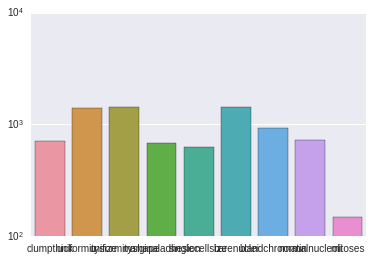

In [197]:
a = sns.barplot(data.columns[1:-1], fclassification[0])
a.get_axes().set_yscale('log')

In [182]:
mutual_info = mutual_info_classif(X, y)

In [184]:
mutual_info /= max(mutual_info)

In [185]:
mutual_info

array([ 0.70223223,  1.        ,  0.95585273,  0.64033375,  0.77071277,
        0.84999925,  0.78042491,  0.68183847,  0.22587875])

The set of mutal information scores has a similar trend to that of the f-test

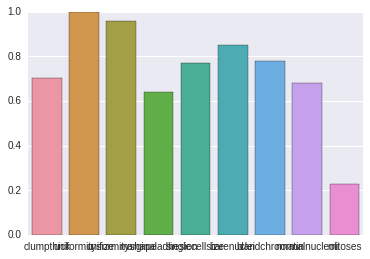

In [196]:
a = sns.barplot(data.columns[1:-1], mutual_info)

Conclusion: use all dimensions of the data to fit a model.

### Next: model fitting.
I'm going to try fitting the following models:
- A logistic regression
- A Naive Bayes classifier
- A support-vector machine classifier
- A random forest

I'll assess model performance by reporting precision and recall and plotting an ROC curve. To train and assess the model, I'll split the data so that 80% of it is used for training and 20% for testing.

In [203]:
# Splitting the dataset:
training = data.sample(frac=0.8)

In [228]:
from sklearn.model_selection import train_test_split

In [233]:
X_train, X_test, y_train, y_test = train_test_split(np.array(data)[:,1:-1], np.array(data)[:,-1], test_size=0.2)

In [294]:
X = np.array(data)[:,1:-1]
y = np.array(data)[:,-1]

In [234]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC, NuSVC, SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier

In [236]:
len(y_train)

546

In [237]:
logreg = LogisticRegression().fit(X_train, y_train)

In [238]:
svc = SVC(kernel='linear').fit(X_train, y_train)
rbf_svc = SVC(kernel='rbf', gamma=0.7).fit(X_train, y_train)
poly_svc = SVC(kernel='poly', degree=3).fit(X_train, y_train)
lin_svc = LinearSVC().fit(X_train, y_train)

In [239]:
mn_naivebayes = MultinomialNB().fit(X_train, y_train)

In [240]:
rf = RandomForestClassifier().fit(X_train, y_train)

In [245]:
print logreg.score(X_test, y_test)
print svc.score(X_test, y_test)
print rbf_svc.score(X_test, y_test)
print poly_svc.score(X_test, y_test)
print lin_svc.score(X_test, y_test)
print mn_naivebayes.score(X_test, y_test)
print rf.score(X_test, y_test)

0.970802919708
0.978102189781
0.883211678832
0.934306569343
0.970802919708
0.890510948905
0.956204379562


In [246]:
# At default parameters, SVC with linear kernel performs best. Can it be further optimized? 
# Logistic regression was pretty good too.

In [272]:
cs = np.logspace(-2, 3, num=10)

In [273]:
for c in cs:
    print(c, SVC(kernel='linear', C=c).fit(X_train, y_train).score(X_test, y_test))

(0.01, 0.96350364963503654)
(0.035938136638046278, 0.96350364963503654)
(0.12915496650148839, 0.97810218978102192)
(0.46415888336127797, 0.97810218978102192)
(1.6681005372000592, 0.97810218978102192)
(5.9948425031894086, 0.97810218978102192)
(21.544346900318846, 0.97810218978102192)
(77.426368268112782, 0.97810218978102192)
(278.2559402207126, 0.97810218978102192)
(1000.0, 0.97810218978102192)


In [281]:
svc = SVC(kernel='linear', C=1).fit(X_train, y_train)

In [274]:
# Seems insensitive to C. Values above 0.08 all seem to produce the same score.

In [275]:
for c in cs:
    print(c, LogisticRegression(C=c).fit(X_train, y_train).score(X_test, y_test))

(0.01, 0.91970802919708028)
(0.035938136638046278, 0.93430656934306566)
(0.12915496650148839, 0.94160583941605835)
(0.46415888336127797, 0.96350364963503654)
(1.6681005372000592, 0.96350364963503654)
(5.9948425031894086, 0.96350364963503654)
(21.544346900318846, 0.96350364963503654)
(77.426368268112782, 0.97080291970802923)
(278.2559402207126, 0.97080291970802923)
(1000.0, 0.97080291970802923)


In [282]:
logreg = LogisticRegression(C=100).fit(X_train, y_train)

In [283]:
# Logistic regression is also insensitive to C above 77.4

In [298]:
from sklearn.model_selection import cross_val_score
predicted = cross_val_score(svc, X, y, cv=200)

In [299]:
np.mean(predicted)

0.9684166666666667

In [295]:
predicted_logreg = cross_val_score(logreg, X, y, cv=200)
print np.mean(predicted_logreg)

0.96975


In [ ]:
# Actually, logistic regression and SVC perform very similarly

### Plot the receiver operating characteristic curve for the data

In [333]:
# Ripped off from scikit-learn's examples
import matplotlib.pyplot as plt
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

# Binarize the output
y_bin = label_binarize(y, classes=["benign", "malignant"])
n_classes = y_bin.shape[1]

# shuffle and split training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y_bin, test_size=.5)

# Learn to predict each class against the other
y_score = logreg.fit(X, y_bin).decision_function(X_test)

roc_auc = dict()
for i in range(n_classes):
    fpr[0], tpr[0], _ = roc_curve(y_test[:], y_score[:])
    roc_auc[0] = auc(fpr[0], tpr[0])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])


In [326]:
roc_auc

{0: 0.99882999882999879, 'micro': 0.99882999882999879}

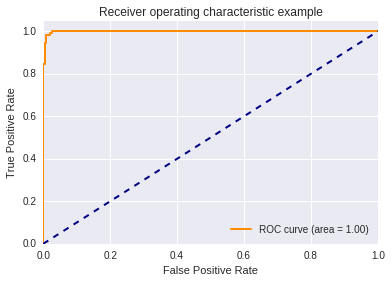

In [332]:
plt.figure()
lw = 2
plt.plot(fpr[0], tpr[0], color='darkorange',lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[0])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [339]:
from sklearn.metrics import precision_recall_curve, average_precision_score

In [340]:
precision, recall, _ = precision_recall_curve(y_test, y_score)
average_precision = average_precision_score(y_test, y_score)

In [341]:
average_precision

0.99120905405162674

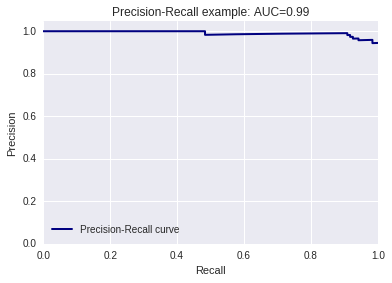

In [343]:
# Plot Precision-Recall curve
plt.clf()
plt.plot(recall, precision, lw=lw, color='navy',
         label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall example: AUC={0:0.2f}'.format(average_precision))
plt.legend(loc="lower left")
plt.show()